#อ่าน File จาก Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

import os

Mounted at /content/drive


In [2]:
data_path = 'drive/My Drive/AUCC/DP/dataset/'
print(os.listdir(data_path))

['TH', 'KR', 'JP', 'CN', 'EN']


#import library

In [3]:
%matplotlib inline

from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [4]:
from pickle import dump
from pickle import load

##DataSet

In [5]:
dataset = data_path + "sound/"
# os.listdir(dataset)

In [6]:
import librosa
import librosa.display

In [7]:
th = dataset + "TH_* (*).wav"
cn = dataset + "CN_* (*).wav"
en = dataset + "EN_* (*).wav"
jp = dataset + "JP_* (*).wav"
kr = dataset + "KR_* (*).wav"

In [8]:
th_signals = [librosa.load(p)[0] for p in Path().glob(th)]
cn_signals = [librosa.load(p)[0] for p in Path().glob(cn)]
en_signals = [librosa.load(p)[0] for p in Path().glob(en)]
jp_signals = [librosa.load(p)[0] for p in Path().glob(jp)]
kr_signals = [librosa.load(p)[0] for p in Path().glob(kr)]

In [9]:
print(len(th_signals))
print(len(cn_signals))
print(len(en_signals))
print(len(jp_signals))
print(len(kr_signals))

0
0
0
0
0


ดูรูปร่างของ wave

In [10]:
plt.figure(figsize=(15, 6))
for i, x in enumerate(en_signals[:10]):
    plt.subplot(2, 5, i+1)
    librosa.display.waveplot(x[:75000])
    plt.ylim(-1, 1)

<Figure size 1080x432 with 0 Axes>

##นิยาม extract features 

In [11]:
def extract_features(signal):
    return [
        librosa.feature.zero_crossing_rate(signal)[0, 0],
        librosa.feature.spectral_centroid(signal)[0, 0],
        librosa.feature.mfcc(signal)[0, 0],
        librosa.feature.rms(signal)[0, 0],
        librosa.feature.spectral_contrast(signal)[0, 0],
    ]

In [12]:
th_features = np.array([extract_features(x) for x in th_signals])
cn_features = np.array([extract_features(x) for x in cn_signals])
en_features = np.array([extract_features(x) for x in en_signals])
jp_features = np.array([extract_features(x) for x in jp_signals])
kr_features = np.array([extract_features(x) for x in kr_signals])

In [13]:
print('Thailand : ',th_features.shape)
print('China : ',cn_features.shape)
print('England : ',en_features.shape)
print('Japan : ',jp_features.shape)
print('Korea : ',kr_features.shape)

Thailand :  (0,)
China :  (0,)
England :  (0,)
Japan :  (0,)
Korea :  (0,)


##Plot Graph

เพื่อเปรียบเทียบแบบ Zero Crossing Rate

In [14]:
plt.figure(figsize=(14, 5))
plt.hist(th_features[:,0], color='b', range=(0, 0.35), alpha=0.5, bins=20)
plt.hist(cn_features[:,0], color='r', range=(0, 0.35), alpha=0.5, bins=20)
plt.hist(en_features[:,0], color='g', range=(0, 0.35), alpha=0.5, bins=20)
plt.hist(jp_features[:,0], color='y', range=(0, 0.35), alpha=0.5, bins=20)
plt.hist(kr_features[:,0], color='orange', range=(0, 0.35), alpha=0.5, bins=20)
plt.legend(('TH', 'CN', 'EN', 'JP', 'KR'))
plt.xlabel('Zero Crossing Rate')
plt.ylabel('Count')

IndexError: ignored

<Figure size 1008x360 with 0 Axes>

เพื่อเปรียบเทียบแบบ Spectral Centroid

In [ ]:
plt.figure(figsize=(14, 5))
plt.hist(th_features[:,1], color='b', range=(0, 7500), alpha=0.5, bins=20)
plt.hist(cn_features[:,1], color='r', range=(0, 7500), alpha=0.5, bins=20)
plt.hist(en_features[:,1], color='g', range=(0, 7500), alpha=0.5, bins=20)
plt.hist(jp_features[:,1], color='y', range=(0, 7500), alpha=0.5, bins=20)
plt.hist(kr_features[:,1], color='orange', range=(0, 7500), alpha=0.5, bins=20)
plt.legend(('TH', 'CN', 'EN', 'JP', 'KR'))
plt.xlabel('Spectral Centroid (frequency bin)')
plt.ylabel('Count')

กำหนด scale ของข้อมูล feature ให้อยู่ในช่วง -1 ถึง 1

In [ ]:
scaler = sklearn.preprocessing.MinMaxScaler(feature_range=(-1, 1))
th_data = scaler.fit_transform(th_features)
cn_data = scaler.fit_transform(cn_features)
en_data = scaler.fit_transform(en_features)
jp_data = scaler.fit_transform(jp_features)
kr_data = scaler.fit_transform(kr_features)

print(th_data.min(axis=0))
print(th_data.max(axis=0))

Plot Scatter

In [ ]:
plt.scatter(th_features[:,0], th_features[:,1], c='b')
plt.scatter(cn_features[:,0], cn_features[:,1], c='r')
plt.scatter(en_features[:,0], en_features[:,1], c='g')
plt.scatter(jp_features[:,0], jp_features[:,1], c='y')
plt.scatter(kr_features[:,0], kr_features[:,1], c='orange')
plt.xlabel('Zero Crossing Rate')
plt.ylabel('Spectral Centroid')


##ข้อมูล train test validation

In [ ]:
len(th_features)

Encoding ผลเฉลย

In [ ]:
yth = [0 for i in range(200)]
ycn = [1 for i in range(200)]
yen = [2 for i in range(200)]
yjp = [3 for i in range(200)]
ykr = [4 for i in range(200)]

แบ่งข้อมูล เพื่อ Train และ Test

In [ ]:
train_th, test_th, yth_train, yth_test = train_test_split(th_features, yth, test_size=0.2, shuffle=True,random_state=123)
train_cn, test_cn, ycn_train, ycn_test = train_test_split(cn_features, ycn, test_size=0.2, shuffle=True,random_state=123)
train_en, test_en, yen_train, yen_test = train_test_split(en_features, yen, test_size=0.2, shuffle=True,random_state=123)
train_jp, test_jp, yjp_train, yjp_test = train_test_split(jp_features, yjp, test_size=0.2, shuffle=True,random_state=123)
train_kr, test_kr, ykr_train, ykr_test = train_test_split(kr_features, ykr, test_size=0.2, shuffle=True,random_state=123)

In [ ]:
train_th.shape,test_th.shape

กำหนด feature table

In [ ]:
train_data = np.vstack((train_th,train_cn,train_en,train_jp,train_kr))
y_train = yth_train+ycn_train+yen_train+yjp_train+ykr_train
y_train = to_categorical(y_train)
print("Train dataset :",train_data.shape)
print("Y-Train dataset :",y_train.shape)

In [ ]:
test_data = np.vstack((test_th,test_cn,test_en,test_jp,test_kr))
y_test = yth_test+ycn_test+yen_test+yjp_test+ykr_test
y_test = to_categorical(y_test)
print("Test dataset :",test_data.shape)
print("Y-Test dataset :",y_test.shape)

แบ่งข้อมูล เพื่อ Train และ Validation

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(train_data, y_train, test_size=0.2, shuffle=True,random_state=123)

In [ ]:
x_train.shape, x_val.shape, y_train.shape, y_val.shape

In [ ]:
print(f'Shape ::\n  Train : {x_train.shape[0]}\n  Valid : {x_val.shape[0]}\n  Test  : {test_data.shape[0]}')

##Model 

นิยาม create_model

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [ ]:
def create_model():
    model = Sequential()
    model.add(Dense(8, input_shape=(5,)))
    model.add(LeakyReLU(alpha=0.1))
    model.add(Dropout(0.1))
    model.add(Dense(5, activation='softmax'))
    return model

In [ ]:
model = create_model()
model.summary()
adam_optim = Adam(learning_rate = 0.0001)
model.compile(optimizer=adam_optim, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
plot_model(model, to_file='model_plot1.png', show_shapes=True, show_layer_names=True)

Train Model

In [ ]:
his = model.fit(
    x_train, y_train,
    batch_size=64,
    epochs=500, 
    verbose=1,
    validation_data = (x_val, y_val)
)

Epoch 1/500
10/10 [==============================] - 2s 29ms/step - loss: 1055.6957 - accuracy: 0.2156 - val_loss: 1149.6899 - val_accuracy: 0.1312
Epoch 2/500
10/10 [==============================] - 0s 6ms/step - loss: 1033.9755 - accuracy: 0.2250 - val_loss: 1136.9203 - val_accuracy: 0.1312
Epoch 3/500
10/10 [==============================] - 0s 7ms/step - loss: 1031.7939 - accuracy: 0.2062 - val_loss: 1124.1624 - val_accuracy: 0.1312
Epoch 4/500
10/10 [==============================] - 0s 6ms/step - loss: 1002.7592 - accuracy: 0.2172 - val_loss: 1111.5896 - val_accuracy: 0.1312
Epoch 5/500
10/10 [==============================] - 0s 8ms/step - loss: 986.4395 - accuracy: 0.2188 - val_loss: 1099.1335 - val_accuracy: 0.1312
Epoch 6/500
10/10 [==============================] - 0s 6ms/step - loss: 1029.6554 - accuracy: 0.2109 - val_loss: 1086.2428 - val_accuracy: 0.1312
Epoch 7/500
10/10 [==============================] - 0s 6ms/step - loss: 965.3942 - accuracy: 0.2250 - val_loss: 1073.

Plot Graph

In [ ]:
import plotly
import plotly.graph_objs as go

Plot Loss

In [ ]:
h1 = go.Scatter(y=his.history['loss'], 
                    mode="lines", line=dict(width=2, color='blue'),
                    name="loss"
               )
h2 = go.Scatter(y=his.history['val_loss'], 
                    mode="lines", line=dict(width=2, color='red'),
                    name="val_loss"
               )
data = [h1,h2]
layout1 = go.Layout(title='Loss',
                    xaxis=dict(title='epochs'),yaxis=dict(title='')
                   )
fig1 = go.Figure(data = data, layout=layout1)
fig1.show()

Plot Accuracy

In [ ]:
h1 = go.Scatter(y=his.history['accuracy'], 
                    mode="lines", line=dict(width=2, color='blue'),
                    name="acc"
               )
h2 = go.Scatter(y=his.history['val_accuracy'], 
                    mode="lines", line=dict(width=2, color='red'),
                    name="val_acc"
               )
data = [h1,h2]
layout1 = go.Layout(title='Accuracy',
                   xaxis=dict(title='epochs'),
                   yaxis=dict(title=''))
fig2 = go.Figure(data = data, layout=layout1)
fig2.show()

##Evaluate

In [ ]:
score = model.evaluate(test_data,y_test, verbose = 0)
print("Test Loss:: ",score[0])
print("Test Accuracy:: ",score[1])

Test Loss::  5.090874671936035
Test Accuracy::  0.20999999344348907


Confusion Matrix

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import pandas as pd

เตรียมทำcm 

In [ ]:
predicted_classes = model.predict(test_data)
predicted_classes = np.argmax(predicted_classes,axis = -1)

In [ ]:
y_true = np.argmax(y_test,axis = -1)

In [ ]:
cm = confusion_matrix(y_true, predicted_classes)
np.savetxt("confusion_matrix.csv", cm, delimiter=",")
cm

array([[ 8,  0,  0,  5, 27],
       [10,  1,  0,  5, 24],
       [14,  1,  0, 13, 12],
       [ 6,  1,  0, 10, 23],
       [ 6,  1,  0, 10, 23]])

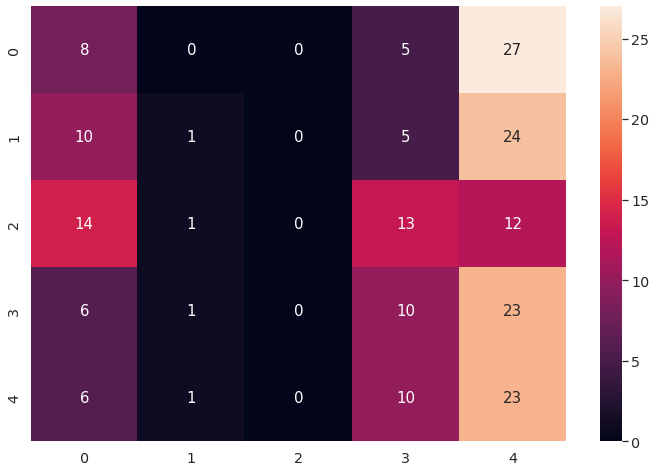

In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt

df_cm = pd.DataFrame(cm, range(5), range(5))
plt.figure(figsize=(12,8))
sn.set(font_scale=1.3) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 15}, fmt='g') # for num predict size

plt.show()

แสดง precision 

In [ ]:
CATEGORIES = ['TH','CN','EN','JP','KR']

In [ ]:
report = classification_report(y_true, predicted_classes, target_names=CATEGORIES, digits=4)

print(report)

              precision    recall  f1-score   support

          TH     0.3012    0.6250    0.4065        40
          CN     0.6000    0.1500    0.2400        40
          EN     0.4286    0.3000    0.3529        40
          JP     0.3562    0.6500    0.4602        40
          KR     0.6667    0.1000    0.1739        40

    accuracy                         0.3650       200
   macro avg     0.4705    0.3650    0.3267       200
weighted avg     0.4705    0.3650    0.3267       200



#CNN Model
**extract feature**


*   mfcc

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D

from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.optimizers import Adam

In [ ]:
file_name = 'drive/My Drive/AUCC/DP/dataset/sound/TH_M (1).wav'
audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 

print(audio.shape, sample_rate)

mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
print(mfccs.shape)

(233856,) 22050
(40, 457)


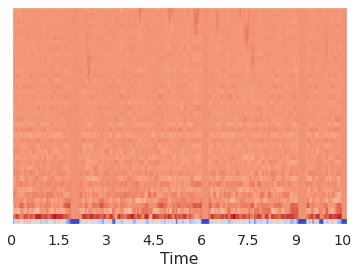

In [ ]:
librosa.display.specshow(mfccs, sr=sample_rate, x_axis='time')

##นิยาม extract feature

In [ ]:
max_pad_len = 1000

def extract_features(file_name):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    pad_width = max_pad_len - mfccs.shape[1]
    mfccs = np.pad(mfccs, pad_width=((0, 0), (0, pad_width)), mode='constant') 
    return mfccs

In [ ]:
TH_features = []
for file_name in Path().glob(th):
    data = extract_features(file_name)
    TH_features.append(data)
print(len(TH_features))
TH_features[0].shape

200


(40, 1000)

In [ ]:
CN_features = []
for file_name in Path().glob(cn):
    data = extract_features(file_name)
    CN_features.append(data)
print(len(CN_features))
CN_features[0].shape

200


(40, 1000)

In [ ]:
EN_features = []
for file_name in Path().glob(en):
    data = extract_features(file_name)
    EN_features.append(data)
print(len(EN_features))
EN_features[0].shape

200


(40, 1000)

In [ ]:
JP_features = []
for file_name in Path().glob(jp):
    data = extract_features(file_name)
    JP_features.append(data)
print(len(JP_features))
JP_features[0].shape

200


(40, 1000)

In [ ]:
KR_features = []
for file_name in Path().glob(kr):
    data = extract_features(file_name)
    KR_features.append(data)
print(len(KR_features))
KR_features[0].shape

200


(40, 1000)

##ข้อมูล train test validation

Encoding ผลเฉลย

In [ ]:
yth = [0 for i in range(200)]
ycn = [1 for i in range(200)]
yen = [2 for i in range(200)]
yjp = [3 for i in range(200)]
ykr = [4 for i in range(200)]

แบ่งข้อมูล เพื่อ Train และ Test

In [ ]:
train_th, test_th, yth_train, yth_test = train_test_split(TH_features, yth, test_size=0.2, shuffle=True,random_state=123)
train_cn, test_cn, ycn_train, ycn_test = train_test_split(CN_features, ycn, test_size=0.2, shuffle=True,random_state=123)
train_en, test_en, yen_train, yen_test = train_test_split(EN_features, yen, test_size=0.2, shuffle=True,random_state=123)
train_jp, test_jp, yjp_train, yjp_test = train_test_split(JP_features, yjp, test_size=0.2, shuffle=True,random_state=123)
train_kr, test_kr, ykr_train, ykr_test = train_test_split(KR_features, ykr, test_size=0.2, shuffle=True,random_state=123)

In [ ]:
len(train_th),len(test_th)

(160, 40)

กำหนด feature table

In [ ]:
train_dt = np.vstack((train_th,train_cn,train_en,train_jp,train_kr))
train_data = train_dt.reshape(train_dt.shape[0], train_dt.shape[1], train_dt.shape[2], 1)
y_train = yth_train+ycn_train+yen_train+yjp_train+ykr_train
y_train = to_categorical(y_train)
print("Train dataset :",train_data.shape)
print("Y-Train dataset :",y_train.shape)

Train dataset : (800, 40, 1000, 1)
Y-Train dataset : (800, 5)


In [ ]:
test_dt = np.vstack((test_th,test_cn,test_en,test_jp,test_kr))
test_data = test_dt.reshape(test_dt.shape[0], test_dt.shape[1], test_dt.shape[2], 1)
y_test = yth_test+ycn_test+yen_test+yjp_test+ykr_test
y_test = to_categorical(y_test)
print("Test dataset :",test_data.shape)
print("Y-Test dataset :",y_test.shape)

Test dataset : (200, 40, 1000, 1)
Y-Test dataset : (200, 5)


แบ่งข้อมูล เพื่อ Train และ Validation

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(train_data, y_train, test_size=0.2, shuffle=True,random_state=123)

In [ ]:
x_train.shape, x_val.shape, y_train.shape, y_val.shape

((640, 40, 1000, 1), (160, 40, 1000, 1), (640, 5), (160, 5))

In [ ]:
print(f'Shape ::\n  Train : {x_train.shape[0]}\n  Valid : {x_val.shape[0]}\n  Test  : {test_data.shape[0]}')

Shape ::
  Train : 640
  Valid : 160
  Test  : 200


##Model

In [ ]:
num_rows = 40
num_columns = 1000
num_channels = 1
num_batch_size = 64
epochs = 500

In [ ]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=2, input_shape=(num_rows, num_columns, num_channels), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=32, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=128, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))
model.add(GlobalAveragePooling2D())

model.add(Dense(5, activation='softmax'))

In [ ]:
model.summary()
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam') 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 39, 999, 16)       80        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 19, 499, 16)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 19, 499, 16)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 18, 498, 32)       2080      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 9, 249, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 9, 249, 32)        0

In [ ]:
his = model.fit(x_train, y_train, 
                batch_size=num_batch_size, 
                epochs=epochs, 
                validation_data=(x_val, y_val), 
                verbose=1)

Epoch 1/500
10/10 [==============================] - 10s 133ms/step - loss: 4.5420 - accuracy: 0.2078 - val_loss: 1.7414 - val_accuracy: 0.2062
Epoch 2/500
10/10 [==============================] - 1s 89ms/step - loss: 2.0627 - accuracy: 0.2766 - val_loss: 1.5087 - val_accuracy: 0.2875
Epoch 3/500
10/10 [==============================] - 1s 90ms/step - loss: 1.5829 - accuracy: 0.4125 - val_loss: 1.5723 - val_accuracy: 0.2313
Epoch 4/500
10/10 [==============================] - 1s 79ms/step - loss: 1.2940 - accuracy: 0.4297 - val_loss: 1.2806 - val_accuracy: 0.4563
Epoch 5/500
10/10 [==============================] - 1s 80ms/step - loss: 1.1900 - accuracy: 0.4859 - val_loss: 1.2474 - val_accuracy: 0.4688
Epoch 6/500
10/10 [==============================] - 1s 79ms/step - loss: 1.0540 - accuracy: 0.5734 - val_loss: 1.1262 - val_accuracy: 0.5688
Epoch 7/500
10/10 [==============================] - 1s 80ms/step - loss: 0.9888 - accuracy: 0.6234 - val_loss: 1.0489 - val_accuracy: 0.6062
Epoc

In [ ]:
import plotly
import plotly.graph_objs as go

Plot Loss

In [ ]:
h1 = go.Scatter(y=his.history['loss'], 
                    mode="lines", line=dict(width=2, color='blue'),
                    name="loss"
               )
h2 = go.Scatter(y=his.history['val_loss'], 
                    mode="lines", line=dict(width=2, color='red'),
                    name="val_loss"
               )
data = [h1,h2]
layout1 = go.Layout(title='Loss',
                    xaxis=dict(title='epochs'),yaxis=dict(title='')
                   )
fig1 = go.Figure(data = data, layout=layout1)
fig1.show()

Plot Accuracy

In [ ]:
h1 = go.Scatter(y=his.history['accuracy'], 
                    mode="lines", line=dict(width=2, color='blue'),
                    name="acc"
               )
h2 = go.Scatter(y=his.history['val_accuracy'], 
                    mode="lines", line=dict(width=2, color='red'),
                    name="val_acc"
               )
data = [h1,h2]
layout1 = go.Layout(title='Accuracy',
                   xaxis=dict(title='epochs'),
                   yaxis=dict(title=''))
fig2 = go.Figure(data = data, layout=layout1)
fig2.show()

##Evalate

In [ ]:
score = model.evaluate(test_data,y_test, verbose = 0)
print("Test Loss:: ",score[0])
print("Test Accuracy:: ",score[1])

Test Loss::  0.07238130271434784
Test Accuracy::  0.9900000095367432


In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import pandas as pd

Confusion matrix

เตรียมทำcm 

In [ ]:
predicted_classes = model.predict(test_data)
predicted_classes = np.argmax(predicted_classes,axis = -1)

In [ ]:
y_true = np.argmax(y_test,axis = -1)

In [ ]:
cm = confusion_matrix(y_true, predicted_classes)
np.savetxt("confusion_matrix.csv", cm, delimiter=",")
cm

array([[40,  0,  0,  0,  0],
       [ 0, 40,  0,  0,  0],
       [ 0,  0, 40,  0,  0],
       [ 0,  0,  0, 40,  0],
       [ 0,  1,  1,  0, 38]])

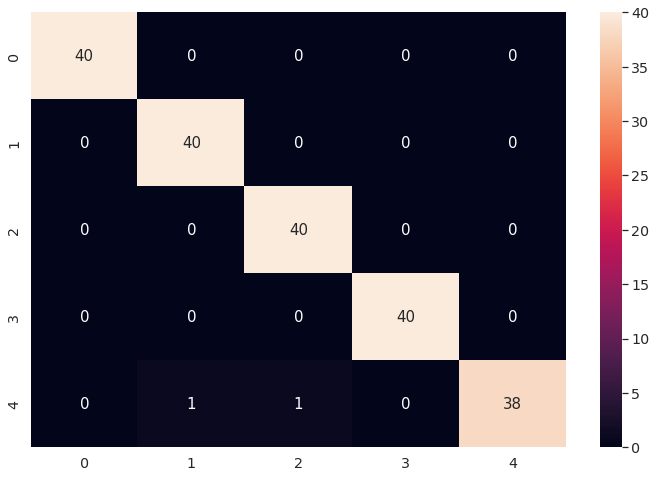

In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt

df_cm = pd.DataFrame(cm, range(5), range(5))
plt.figure(figsize=(12,8))
sn.set(font_scale=1.3) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 15}, fmt='g') # for num predict size

plt.show()

แสดง precision 

In [ ]:
CATEGORIES = ['TH','CN','EN','JP','KR']

In [ ]:
report = classification_report(y_true, predicted_classes, target_names=CATEGORIES, digits=4)

print(report)

              precision    recall  f1-score   support

          TH     1.0000    1.0000    1.0000        40
          CN     0.9756    1.0000    0.9877        40
          EN     0.9756    1.0000    0.9877        40
          JP     1.0000    1.0000    1.0000        40
          KR     1.0000    0.9500    0.9744        40

    accuracy                         0.9900       200
   macro avg     0.9902    0.9900    0.9899       200
weighted avg     0.9902    0.9900    0.9899       200

